You can read the DICOM metadata - especially "Window Center", "Window Width", "Rescale Intercept" and "Rescale Slope" - for data pre-processing.
Head CT are a center of 40 and a width of 80

In [135]:
import sys
import os
import ast
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
import pydicom
import re
import PIL
from PIL import Image
from random import randrange
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

train_csv_path = '../src/training.csv'
validate_csv_path = '../src/validation.csv'
test_csv_path = '../src/testing.csv'

tony_data_path = ''
chris_data_path = ''
kyle_data_path = '/media/keil/baltar/intracranial-hemorrhage-detection-data/stage_1_train_images/'

In [29]:
bad_actors = []

In [54]:
def window_image(img, window_center, window_width, intercept, slope):
    """
    Given a CT scan img apply a windowing to the image
    Arguments:
        img {np.array} -- array of a dicom img processed by pydicom.dcmread()
        window_center,window_width,intercept,slope {floats} -- values provided by dicom file metadata
    """
    img = (img * slope + intercept)
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img[img < img_min] = img_min
    img[img > img_max] = img_max
    return img 

In [129]:
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

def get_windowing(data):
    dicom_fields = [data.WindowCenter,
                    data.WindowWidth,
                    data.RescaleIntercept,
                    data.RescaleSlope]
    return (get_first_of_dicom_field_as_int(x) for x in dicom_fields)

In [130]:
def translate_dicom(filename, path=kyle_data_path, apply_window=True):
    """
    Transform a medical DICOM file to a standardized pixel based array
    Arguments:
        filename {string}
        path {string} -- file path to data, set in config.ini
        apply_window {bool} -- if True (default) then windowed png of dicom data is returned
    """
    
    data = pydicom.dcmread(path + filename)
    
    if apply_window:
        window_center, window_width, intercept, slope = get_windowing(data)
        img = window_image(data.pixel_array, window_center, window_width, intercept, slope)
        return np.array(img, dtype=float)

    img = np.array(data.pixel_array, dtype=float)
    standardized_array = np.divide(np.subtract(img,img.mean()),img.std())
    return standardized_array

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)



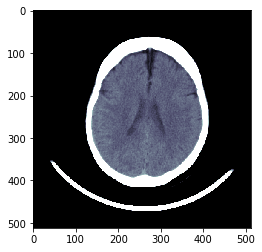

In [134]:
for idx, dicom in tqdm(enumerate(os.listdir(kyle_data_path))):
    if dicom in bad_actors:
        continue
        
    img = translate_dicom(dicom, apply_window=True) 
    
    print(img.shape)
    

    plt.imshow(img, cmap=plt.cm.bone)

    
    if idx == 5:
        break
    

In [ ]:
case = 5

data = pydicom.dcmread(train[case])

#print(data)
window_center , window_width, intercept, slope = get_windowing(data)


#displaying the image
img = pydicom.read_file(train[case]).pixel_array

img = window_image(img, window_center, window_width, intercept, slope)
plt.imshow(img, cmap=plt.cm.bone)
plt.grid(False)

print(data)
